## 导数和微分

In [2]:
import numpy as np
from IPython import display
from d2l import torch as d2l
from matplotlib import pyplot as plt

In [3]:
def use_svg_display():
    """设置jupyter 中 matplotlib 的显示格式"""
    display.set_matplotlib_formats('svg')

In [5]:
def set_figsize(figsize=[3.5, 2.5]):
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize
    #plt.rcParams['figure.figsize'] = figsize

In [6]:
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)  # 图例的位置
    axes.grid()

In [43]:
def plot(X, Y=None, xlabel=None, ylabel=None, xlim=None, ylim=None, 
         xscale='linear', yscale='linear', legend=None,
        fmts=('-', 'm--', 'g-.', 'r:'), figsize=[3.5, 2.5], axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()  # 创建画布
    
    def has_one_axis(X):
        """如果X只有一个轴，输出True"""
        return (hasattr(X, 'ndim') and X.ndim == 1 or 
                isinstance(X, list) and not hasattr(X[0], '__len__'))
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):  # 样本集 和 y 函数个数保持相同
        X = X * len(Y)
    axes.cla()  # 清除当前轴
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        

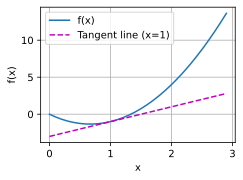

In [44]:
x = np.arange(0, 3, 0.1)
def f(x):
    return 3 * x ** 2 - 4 * x
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 偏导数

多元函数 y 关于第 i 个参数 x_i 的导数，称为这个参数的偏导数。

## 梯度

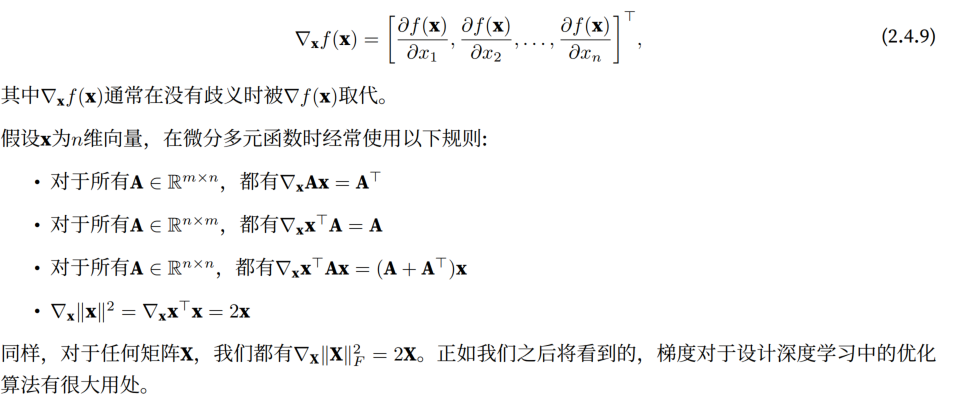



## 自动求导

In [45]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [46]:
x.requires_grad_(requires_grad=True)  # 等价于 x = torch.arange(4.0, requires_grad=True)
x.grad

In [48]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [49]:
y.backward()  # 反向传播函数
x.grad

tensor([ 0.,  4.,  8., 12.])

In [50]:
x.grad == 4 * x

tensor([True, True, True, True])

In [51]:
x.grad.zero_()

tensor([0., 0., 0., 0.])

In [53]:
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

## 非标量变量的反向传播

In [54]:
x.grad.zero_()
y = x * x
y.sum().backward() #
x.grad

tensor([0., 2., 4., 6.])

# 分离计算

In [86]:
x.grad.zero_()
y = x * x
u = y.detach()  # 分离出y, z 对 x 的求导不流经 y.
z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [87]:
x.grad.zero_()
y.sum().backward(retain_graph=True)  # 由于记录了 y 的计算结果，随后仍可以在 y 上调用反向传播。
x.grad

tensor([0., 2., 4., 6.])

In [88]:
x.grad.zero_()
y.sum().backward(retain_graph=True)  # 由于记录了 y 的计算结果，随后仍可以在 y 上调用反向传播。
x.grad

tensor([0., 2., 4., 6.])

In [89]:
x.grad.zero_()
y.sum().backward()  # 由于记录了 y 的计算结果，随后仍可以在 y 上调用反向传播。
x.grad

tensor([0., 2., 4., 6.])